# Credit Card Transaction Analysis

The objective of this analysis is to use historical credit card transaction data to build a model that can predict fraudulent transactions.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

In [4]:
%matplotlib inline

### Import Data

In [5]:
df = pd.read_csv('/users/Vishal/Documents/Data/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
class_counts = df.Class.value_counts()
class_counts

0    284315
1       492
Name: Class, dtype: int64

*Class value '1' indicates fraudelent transaction*

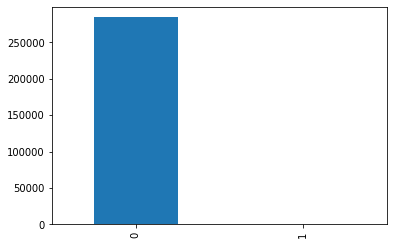

In [8]:
class_counts.plot(kind= 'bar')

> Classes are highly imbalanced

In [11]:
len(df.loc[df.Class==1])/len(df.loc[df.Class==0])*100

0.17304750013189596

*0.17% of dataset belongs to target class*

### Create Train & Test sets

In [12]:
y = df.Class
X = df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

### Train Random Forest Classifier and test Recall score 

Since the objective is to detect fraudelent transactions we will use Recall score 'the number of true positives divided by the number of positive values in the test data' to test the accuracy of the model. 

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [17]:
pd.DataFrame(confusion_matrix(y_test,rfc_pred))

,0,1
0,56874,4
1,20,64


In [19]:
recall_score(y_test,rfc_pred)

0.7857142857142857

In [22]:
precision_score(y_test,rfc_pred)

0.9428571428571428

In [23]:
f1_score(y_test,rfc_pred)

0.8571428571428571

**Our model is able to correctly identify 79% of fraudelent transactions in the test set and we got about 6% of false positives.**